In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.preprocessing import image


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
%matplotlib inline


Using TensorFlow backend.


In [ ]:
train_dataset = h5py.File('/content/train_happy.h5', "r")
test_dataset = h5py.File('/content/test_happy.h5', "r")

In [ ]:
#train set features
train_set_features = np.array(train_dataset["train_set_x"][:])
#train set labels
train_set_labels = np.array(train_dataset["train_set_y"][:])
#test set features
test_set_features = np.array(test_dataset["test_set_x"][:])
# test set labels
test_set_labels = np.array(test_dataset["test_set_y"][:])

In [ ]:
#list of classes
classes = np.array(test_dataset['list_classes'][:])

In [ ]:
X_train = train_set_features / 255.
X_test = test_set_features / 255.
Y_train = train_set_labels.T
Y_test = test_set_labels.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


In [ ]:
def EmotionTracker(input_shape):
  #Input image
  X_input = Input(input_shape)
  #Padding
  X = ZeroPadding2D((3, 3))(X_input)
  #Convolutional layer, BatchNormalization, Activationon X
  X = Conv2D(32, (3, 3), strides = (1,1), name = 'conv0')(X_input)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)

  #MaxPool layer
  X = MaxPooling2D((2,2), name = 'max_pool')(X)
  #Flatten X 
  X = Flatten()(X)
  # Fully Conneected Layer
  X = Dense(1, activation = 'sigmoid', name = 'fully_connected')(X)
  #Create Model
  model = Model(inputs = X_input, outputs = X, name = 'EmotionTracker')

  return model

In [ ]:
emotiontracker = EmotionTracker(X_train.shape[1:])

## Compile Model

In [ ]:
emotiontracker.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Train Model

In [ ]:
emotiontracker.fit(X_train, Y_train, batch_size = 15, epochs = 30)

Epoch 1/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9783
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0097 - accuracy: 0.9967
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9967
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0397 - accuracy: 0.9883
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0272 - accuracy: 0.9900
Epoch 8/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1817 - accuracy: 0.9550
Epoch 9/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0723 - accuracy: 0.9833
Epoch 10/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.9983

## Evaluate Model

In [ ]:
predict = emotiontracker.evaluate(X_test, Y_test)
print('Loss = ' + str(predict[0]))
print('Test Accuracy = ' + str(predict[1]))

150/150 [==============================] - 0s 2ms/step
Loss = 0.20046023639724203
Test Accuracy = 0.95333331823349


In [ ]:
emotiontracker.summary()

Model: "EmotionTracker"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 62, 62, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
fully_connected (Dense)      (None, 1)              

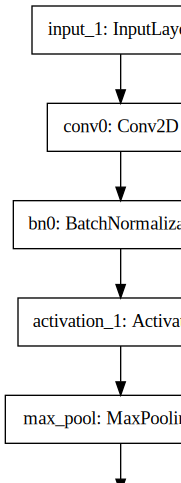

In [ ]:
plot_model(emotiontracker, to_file='EmotionTracker.png')
SVG(model_to_dot(emotiontracker).create(prog='dot', format='svg'))

## Test your image here

[[1.]]


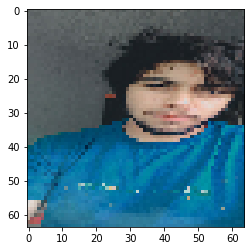

In [ ]:
img_path = '/content/Snapchat.jpg'
img = image.load_img(img_path, target_size = (64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)
print(emotiontracker.predict(x))